In [1]:
import sys
print(sys.executable)
print(sys.version)

D:\22FE1A4210\minicondapro\envs\tf310\python.exe
3.10.18 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:08:55) [MSC v.1929 64 bit (AMD64)]


In [4]:
pip install flask tensorflow pillow numpy werkzeug scikit-learn matplotlib jupyter

  Using cached jupyter-1.1.1-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached jupyter_console-6.6.3-py3-none-any.whl.metadata (5.8 kB)
  Using cached widgetsnbextension-4.0.14-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 6.7 MB/s eta 0:00:02
   ----- ---------------------------------- 1.0/8.1 MB 3.0 MB/s eta 0:00:03
   ------ --------------------------------- 1.3/8.1 MB 2.2 MB/s eta 0:00:04
   ------- -------------------------------- 1.6/8.1 MB 1.8 MB/s eta 0:00:04
   --------- ------------------------------ 1.8/8.1 MB 1.7 MB/s eta 0:00:04
   ---------- ----------------------------- 2.1/8.1 MB 1.6 MB/s eta 0:00:04
   ----------- ---------------------------- 2.4/8.1 MB 1.6 MB/s eta 0:00:04
   ------------- -------------------------- 2.6/8.1 M

In [5]:
import os
import shutil
import random
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from IPython.display import display, Image
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import zipfile 

In [22]:
extract_dir = 'Fruit And Vegetable Diseases Dataset_extracted' # Or any name you prefer for the extracted folder
classes = os.listdir(extract_dir)
print(classes)

['Apple__Healthy', 'Apple__Rotten', 'Banana__Healthy', 'Banana__Rotten', 'Bellpepper__Healthy', 'Bellpepper__Rotten', 'Carrot__Healthy', 'Carrot__Rotten', 'Cucumber__Healthy', 'Cucumber__Rotten']


In [23]:
import os
import shutil
from sklearn.model_selection import train_test_split

dataset_base_dir = 'Fruit And Vegetable Diseases Dataset_extracted'
output_dir = 'output_dataset'

os.makedirs(output_dir, exist_ok=True)
os.makedirs(os.path.join(output_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'val'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'test'), exist_ok=True)

classes = os.listdir(dataset_base_dir)
classes = [cls for cls in classes if os.path.isdir(os.path.join(dataset_base_dir, cls))]

for cls in classes:
    os.makedirs(os.path.join(output_dir, 'train', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'val', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'test', cls), exist_ok=True)

    class_source_dir = os.path.join(dataset_base_dir, cls)

    all_images = [img for img in os.listdir(class_source_dir) if img.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    images_to_process = all_images[:200] if len(all_images) > 200 else all_images

    print(f"Processing class: {cls}, found {len(all_images)} images, processing {len(images_to_process)}.")

    if not images_to_process:
        print(f"Warning: No images found or processed for class {cls}. Skipping split for this class.")
        continue

    train_and_val_images, test_images = train_test_split(images_to_process, test_size=0.2, random_state=42)
    train_images, val_images = train_test_split(train_and_val_images, test_size=0.25, random_state=42)

    print(f"  Train: {len(train_images)} images, Val: {len(val_images)} images, Test: {len(test_images)} images.")

    for img in train_images:
        shutil.copy(os.path.join(class_source_dir, img), os.path.join(output_dir, 'train', cls, img))
    for img in val_images:
        shutil.copy(os.path.join(class_source_dir, img), os.path.join(output_dir, 'val', cls, img))
    for img in test_images:
        shutil.copy(os.path.join(class_source_dir, img), os.path.join(output_dir, 'test', cls, img))

print("\nDataset split into training, validation, and test sets successfully!")

Processing class: Apple__Healthy, found 444 images, processing 200.
  Train: 120 images, Val: 40 images, Test: 40 images.
Processing class: Apple__Rotten, found 372 images, processing 200.
  Train: 120 images, Val: 40 images, Test: 40 images.
Processing class: Banana__Healthy, found 360 images, processing 200.
  Train: 120 images, Val: 40 images, Test: 40 images.
Processing class: Banana__Rotten, found 564 images, processing 200.
  Train: 120 images, Val: 40 images, Test: 40 images.
Processing class: Bellpepper__Healthy, found 552 images, processing 200.
  Train: 120 images, Val: 40 images, Test: 40 images.
Processing class: Bellpepper__Rotten, found 360 images, processing 200.
  Train: 120 images, Val: 40 images, Test: 40 images.
Processing class: Carrot__Healthy, found 503 images, processing 200.
  Train: 120 images, Val: 40 images, Test: 40 images.
Processing class: Carrot__Rotten, found 408 images, processing 200.
  Train: 120 images, Val: 40 images, Test: 40 images.
Processing cla

In [24]:
dataset_dir = 'output_dataset'
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

IMG_SIZE = (224, 224)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

print(train_generator.class_indices)
print(val_generator.class_indices)
print(test_generator.class_indices)

Found 1312 images belonging to 10 classes.
Found 442 images belonging to 10 classes.
Found 439 images belonging to 10 classes.
{'Apple__Healthy': 0, 'Apple__Rotten': 1, 'Banana__Healthy': 2, 'Banana__Rotten': 3, 'Bellpepper__Healthy': 4, 'Bellpepper__Rotten': 5, 'Carrot__Healthy': 6, 'Carrot__Rotten': 7, 'Cucumber__Healthy': 8, 'Cucumber__Rotten': 9}
{'Apple__Healthy': 0, 'Apple__Rotten': 1, 'Banana__Healthy': 2, 'Banana__Rotten': 3, 'Bellpepper__Healthy': 4, 'Bellpepper__Rotten': 5, 'Carrot__Healthy': 6, 'Carrot__Rotten': 7, 'Cucumber__Healthy': 8, 'Cucumber__Rotten': 9}
{'Apple__Healthy': 0, 'Apple__Rotten': 1, 'Banana__Healthy': 2, 'Banana__Rotten': 3, 'Bellpepper__Healthy': 4, 'Bellpepper__Rotten': 5, 'Carrot__Healthy': 6, 'Carrot__Rotten': 7, 'Cucumber__Healthy': 8, 'Cucumber__Rotten': 9}


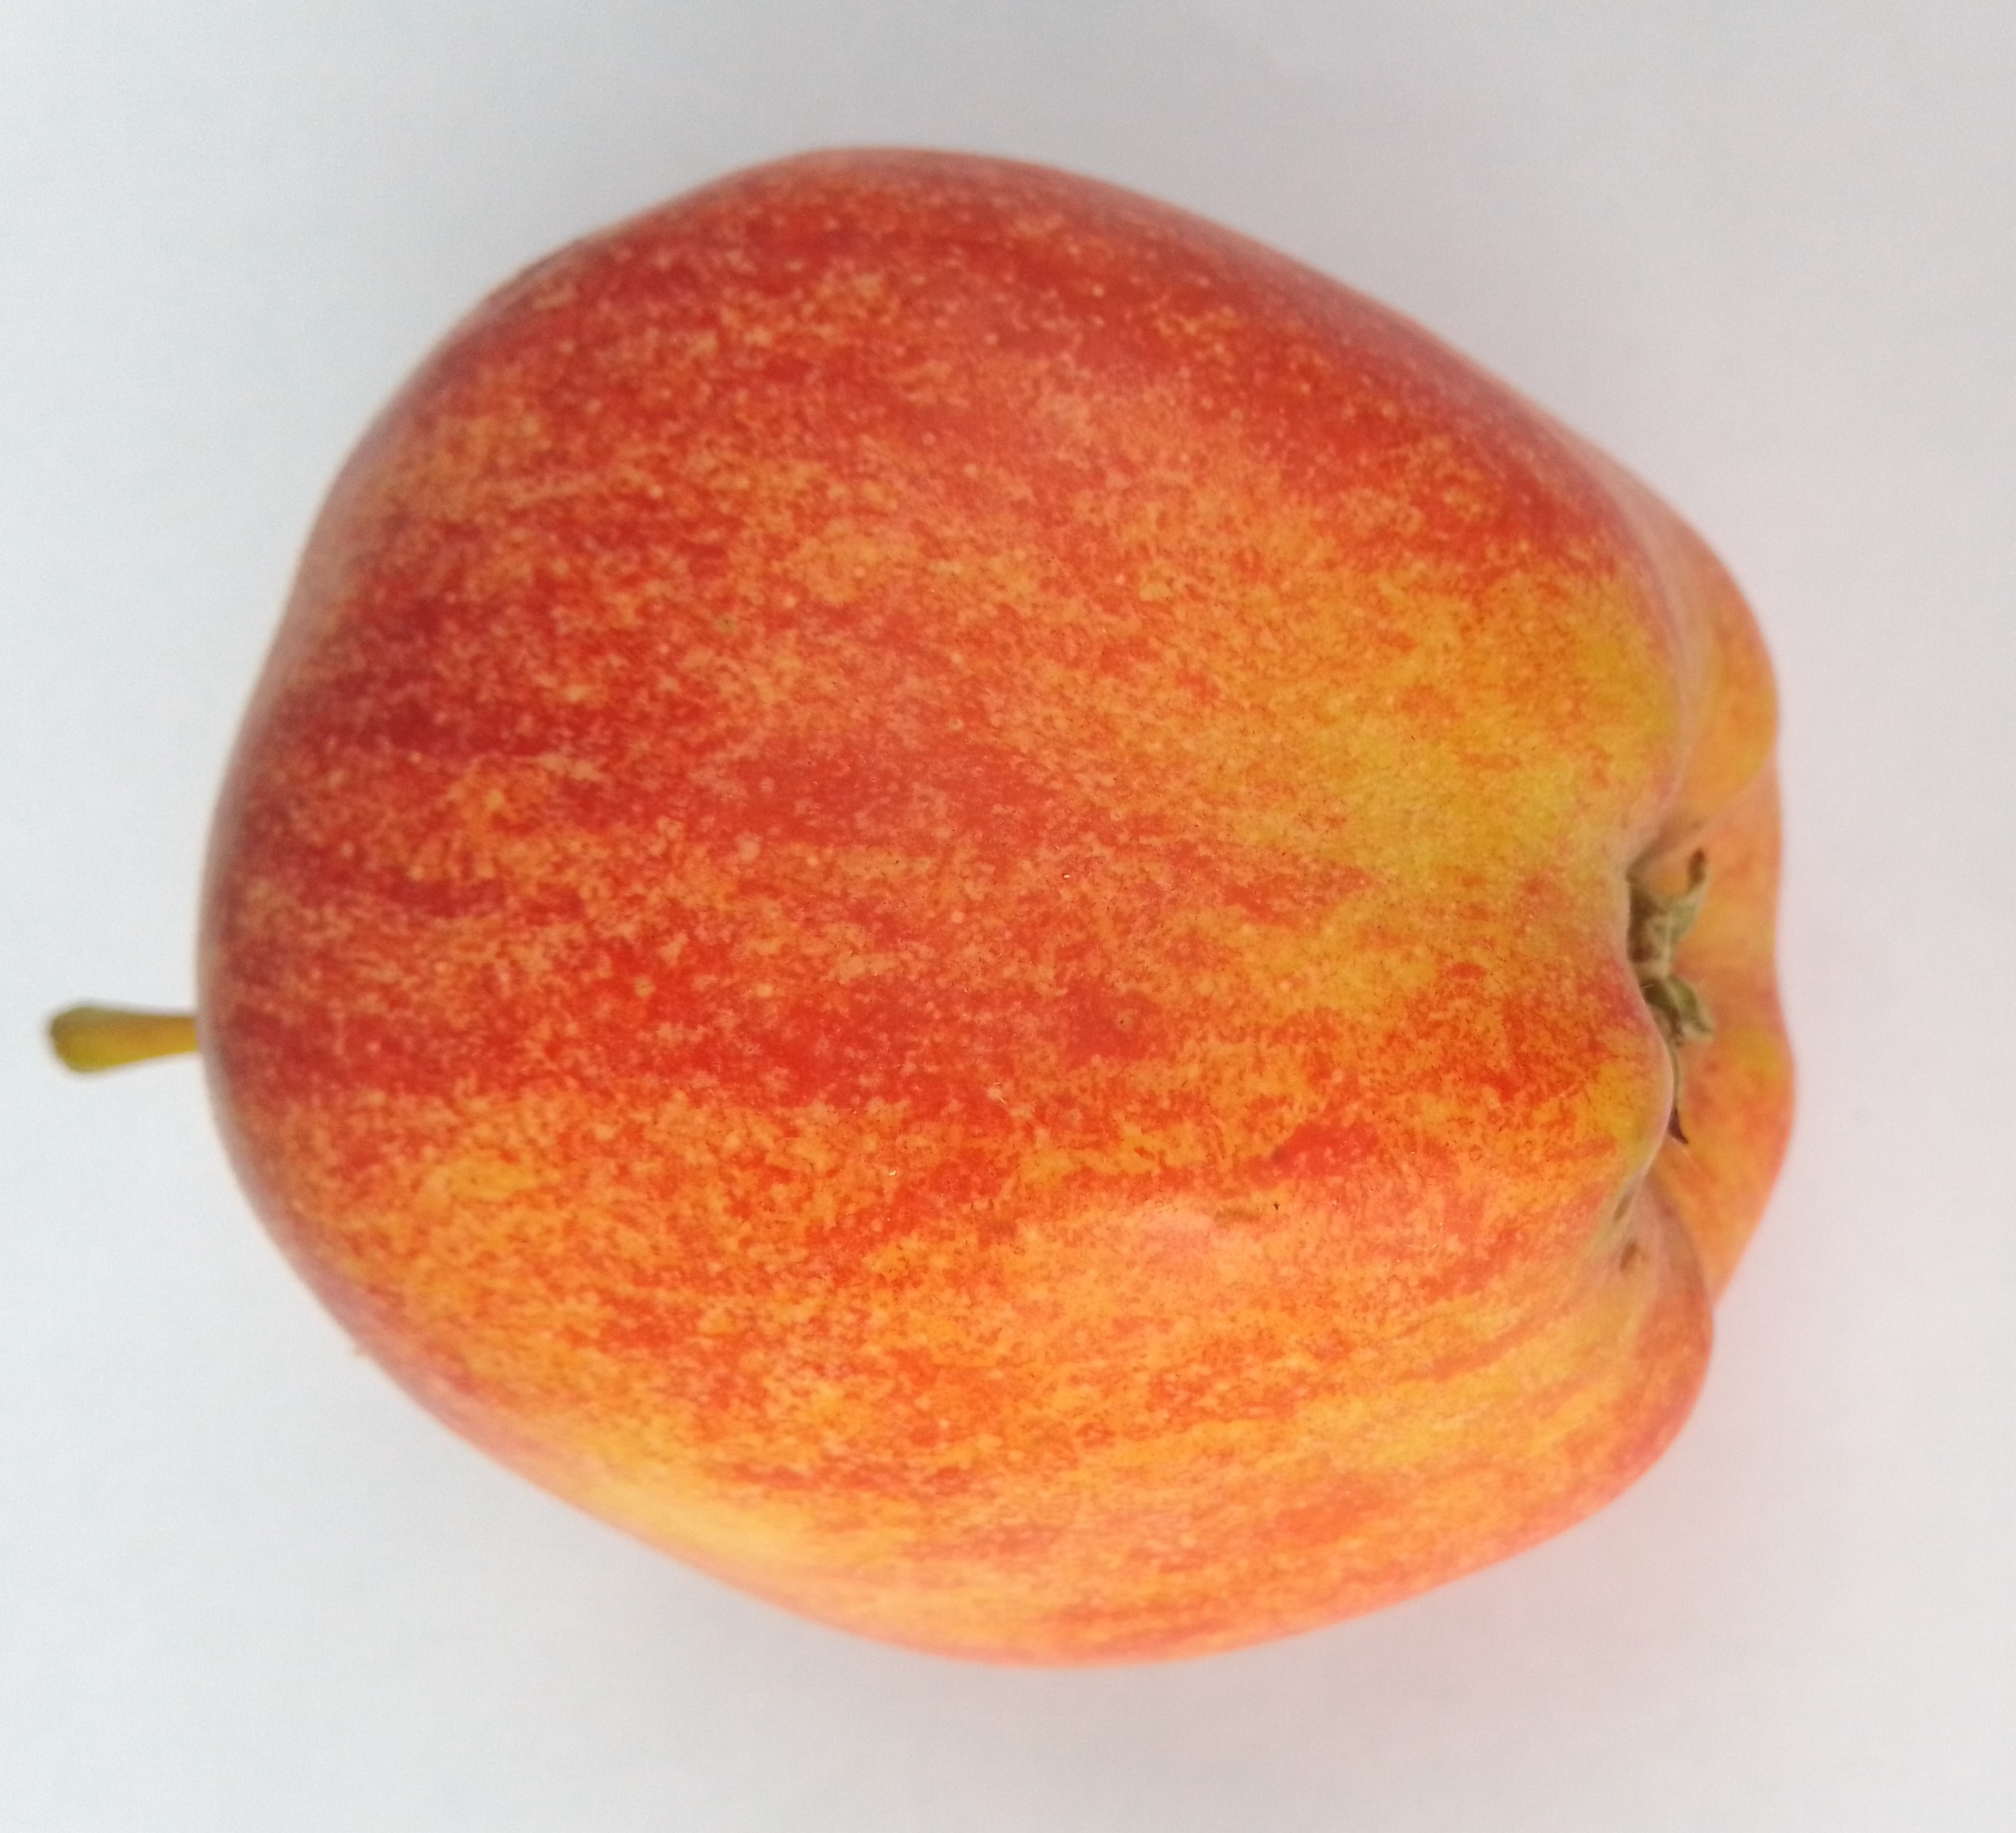

In [25]:
# 2. Visualize random images
random_img_path = os.path.join('output_dataset/train/Apple__Healthy', random.choice(
    [f for f in os.listdir('output_dataset/train/Apple__Healthy') if f.endswith(('.jpg', '.png', '.jpeg'))]))
display(Image(filename=random_img_path))

In [26]:
# 3. Prepare ImageDataGenerators
dataset_dir = 'output_dataset'
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

IMG_SIZE = (224, 224)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

num_classes = len(train_generator.class_indices)


Found 1312 images belonging to 10 classes.
Found 442 images belonging to 10 classes.
Found 439 images belonging to 10 classes.


In [27]:
# 4. Load VGG16 and build model
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))

for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
output = Dense(num_classes, activation='softmax')(x)
vgg16 = Model(vgg.input, output)

vgg16.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# 5. Train model
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history = vgg16.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    steps_per_epoch=10,
    callbacks=[early_stopping]
)

# 6. Save model
vgg16.save('healthy_vs_rotten.h5')

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 215s 22s/step - accuracy: 0.1489 - loss: 2.3645 - val_accuracy: 0.3167 - val_loss: 1.9798
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 203s 22s/step - accuracy: 0.3157 - loss: 2.0625 - val_accuracy: 0.5204 - val_loss: 1.6100
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 204s 22s/step - accuracy: 0.4751 - loss: 1.6947 - val_accuracy: 0.5520 - val_loss: 1.3986
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 202s 21s/step - accuracy: 0.5599 - loss: 1.5393 - val_accuracy: 0.7059 - val_loss: 1.1874
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 125s 13s/step - accuracy: 0.7812 - loss: 1.2216 - val_accuracy: 0.7081 - val_loss: 1.1733
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 209s 22s/step - accuracy: 0.7018 - loss: 1.3422 - val_accuracy: 0.7036 - val_loss: 1.0795
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 206s 22s/step - accuracy: 0.6817 - loss: 1.1978 - val_accuracy: 0.7443 - val_loss: 0.9676
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 197s 21s/step - accuracy: 0.7472 - loss: 1.0784 - val_accuracy: 0.

In [21]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

# 1. Load the saved model
vgg16 = load_model('healthy_vs_rotten.h5')

# 2. Load and preprocess your image
img_path = 'Fruit And Vegetable Diseases Dataset_extracted/Bellpepper__Rotten/rottenPepper (90).jpg'  # replace with your test image path
img = load_img(img_path, target_size=(224, 224))  # Resize to match model input
x = img_to_array(img)  # Convert to array
x = preprocess_input(x)  # Preprocess as per VGG16
x = np.expand_dims(x, axis=0)  # Add batch dimension

# 3. Make prediction
preds = vgg16.predict(x)

# 4. Interpret result
predicted_class_index = np.argmax(preds[0])
print("Predicted class index:", predicted_class_index)

# Optional: If you have class names
class_labels = list(train_generator.class_indices.keys())  # reuse from training
print("Predicted class label:", class_labels[predicted_class_index])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class index: 6
Predicted class label: Bellpepper__Rotten
